# STAGE 3 DATA CLEANING

In [1]:
import pandas as pd 

In [143]:
df = pd.read_excel('../data/processed/DOE_Stage_2.xlsx')

In [144]:
df.head()

,Month,Time Event Began,Time of Restoration,Area Affected,NERC Region,Alert Criteria,Event Type,Demand Loss (MW),Number of Customers Affected
0,January,2002-01-29 16:00:00,2002-01-29 19:30:00,Metropolitan Kansas City Area,SPP,Unkown,Severe Weather - Winter/Snow/Ice,600.0,270000.0
1,January,2002-01-30 06:00:00,2002-01-30 12:00:00,Oklahoma,SPP,Unknown,Severe Weather - Winter/Snow/Ice,500.0,1881134.0
2,January,2002-01-30 16:00:00,2002-01-30 21:00:00,Missouri,SPP,Unknown,Severe Weather - Winter/Snow/Ice,210.0,95000.0
3,February,2002-02-27 10:48:00,2002-02-27 11:35:00,California,WECC,Unknown,Unkown/Unspecified,300.0,255000.0
4,March,2002-03-09 00:00:00,2002-03-09 12:00:00,Lower Peninsula of Michigan,RFC,Unknown,Severe Weather - Unspecified/Other,190.0,190000.0


In [145]:
col = df.columns.tolist()
df = df.rename(str.lower, axis='columns')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   month                         3892 non-null   object        
 1   time event began              3892 non-null   datetime64[ns]
 2   time of restoration           3892 non-null   datetime64[ns]
 3   area affected                 3892 non-null   object        
 4   nerc region                   3892 non-null   object        
 5   alert criteria                3892 non-null   object        
 6   event type                    3892 non-null   object        
 7   demand loss (mw)              2441 non-null   float64       
 8   number of customers affected  3157 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 273.8+ KB


In [147]:
df['demand loss (mw)'] = pd.to_numeric(df['demand loss (mw)'], errors='coerce')
df['number of customers affected'] = pd.to_numeric(df['number of customers affected'], errors='coerce')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   month                         3892 non-null   object        
 1   time event began              3892 non-null   datetime64[ns]
 2   time of restoration           3892 non-null   datetime64[ns]
 3   area affected                 3892 non-null   object        
 4   nerc region                   3892 non-null   object        
 5   alert criteria                3892 non-null   object        
 6   event type                    3892 non-null   object        
 7   demand loss (mw)              3892 non-null   float64       
 8   number of customers affected  3892 non-null   Int64         
dtypes: Int64(1), datetime64[ns](2), float64(1), object(5)
memory usage: 277.6+ KB


In [152]:
# Calculate the duration column
df['duration'] = df['time of restoration'] - df['time event began']

# Filter rows with negative duration
negative_duration_df = df[df['duration'] < pd.Timedelta(0)]

# Display the DataFrame with negative duration
print(negative_duration_df.count())

month                           763
time event began                763
time of restoration             763
area affected                   763
nerc region                     763
alert criteria                  763
event type                      763
demand loss (mw)                763
number of customers affected    763
duration                        763
dtype: int64


In [153]:
# Create a mask for rows where the date difference is negative and 'time of restoration' starts with 00: and has minutes
mask = (df['time of restoration'].dt.strftime('%H:%M') == '00:') & (df['time of restoration'].dt.minute > 0) & (df['time of restoration'] < df['time event began'])

# Add a day to 'time of restoration' for rows where the mask is True
df.loc[mask, 'time of restoration'] += pd.DateOffset(days=1)


In [154]:
negative_diff_mask = df['time of restoration'] < df['time event began']

# Swap dates for rows with negative date difference
df.loc[negative_diff_mask, ['time event began', 'time of restoration']] = df.loc[negative_diff_mask, ['time of restoration', 'time event began']].values

df.head()

,month,time event began,time of restoration,area affected,nerc region,alert criteria,event type,demand loss (mw),number of customers affected,duration
0,January,2002-01-29 16:00:00,2002-01-29 19:30:00,Metropolitan Kansas City Area,SPP,Unkown,Severe Weather - Winter/Snow/Ice,600.0,270000,0 days 03:30:00
1,January,2002-01-30 06:00:00,2002-01-30 12:00:00,Oklahoma,SPP,Unknown,Severe Weather - Winter/Snow/Ice,500.0,1881134,0 days 06:00:00
2,January,2002-01-30 16:00:00,2002-01-30 21:00:00,Missouri,SPP,Unknown,Severe Weather - Winter/Snow/Ice,210.0,95000,0 days 05:00:00
3,February,2002-02-27 10:48:00,2002-02-27 11:35:00,California,WECC,Unknown,Unkown/Unspecified,300.0,255000,0 days 00:47:00
4,March,2002-03-09 00:00:00,2002-03-09 12:00:00,Lower Peninsula of Michigan,RFC,Unknown,Severe Weather - Unspecified/Other,190.0,190000,0 days 12:00:00


In [155]:
# Calculate the duration column
df['duration'] = df['time of restoration'] - df['time event began']

# Filter rows with negative duration
negative_duration_df = df[df['duration'] < pd.Timedelta(0)]

# Display the DataFrame with negative duration
print(negative_duration_df.count())

month                           0
time event began                0
time of restoration             0
area affected                   0
nerc region                     0
alert criteria                  0
event type                      0
demand loss (mw)                0
number of customers affected    0
duration                        0
dtype: int64


In [156]:
df = df.drop('duration', axis='columns')

In [159]:

import re
# Function to extract only state names from 'Area Affected'
def extract_states(area):
    # Use a regular expression to find state names (assuming state names start with an uppercase letter)
    states = re.findall(r'\b[A-Z][a-z]*\b', area)
    return states

df['state_temp'] = df['area affected'].apply(extract_states) 



In [160]:
# US and Canada - Ontario excluded due to US counties with similar names. Will manually validate
valid_locations = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
    'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont','West Virginia','Virginia', 'Washington',
    'Wisconsin', 'Wyoming','Puerto Rico', 'Nova Scocia', 'manitoba', 'Quebec', 'Alberta', 'Saskatchewan',
    'British Columbia','Prince Edward Island', 'New Brunswick'
]

In [161]:
# Function to filter only valid state names from the list
def second_extract_states(state_list):
    return [state for state in state_list if state in valid_locations]

# Apply the function to create the 'state' column
df['state'] = df['state_temp'].apply(second_extract_states)

In [162]:
df2 = df.copy()
df2 = df2.rename(str.upper, axis='columns')

df2.to_excel('../data/processed/DOE_Stage_3-1.xlsx', index=False)

In [21]:
df3 = pd.read_excel('../data/processed/DOE_Stage_3-1.xlsx')
df3 = df3.rename(str.upper, axis='columns')

Manually save `DOE_Stage_3-2.xlsx` and clean state data.

In [15]:
df4 = pd.read_excel('../data/processed/DOE_Stage_3-2.xlsx')

In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MONTH                         3892 non-null   object        
 1   TIME EVENT BEGAN              3892 non-null   datetime64[ns]
 2   TIME OF RESTORATION           3892 non-null   datetime64[ns]
 3   AREA AFFECTED                 3892 non-null   object        
 4   NERC REGION                   3892 non-null   object        
 5   ALERT CRITERIA                3892 non-null   object        
 6   EVENT TYPE                    3892 non-null   object        
 7   Demand Loss (MW)              2441 non-null   float64       
 8   Number of Customers Affected  3157 non-null   float64       
 9   STATE_TEMP                    3892 non-null   object        
 10  STATE 3                       3892 non-null   object        
dtypes: datetime64[ns](2), float64(

In [ ]:
# df3 = pd.concat([df3, df4['STATE 3']], axis=1)


In [ ]:
df4.to_excel('../data/processed/DOE_Stage_3-3.xlsx', index=False)

## Fill Missing Values

In [2]:
import pandas as pd 

In [3]:
df_3_3 =pd.read_excel('../data/processed/DOE_Stage_3-3.xlsx')

In [3]:
df_3_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MONTH                         3892 non-null   object        
 1   TIME EVENT BEGAN              3892 non-null   datetime64[ns]
 2   TIME OF RESTORATION           3892 non-null   datetime64[ns]
 3   AREA AFFECTED                 3892 non-null   object        
 4   NERC REGION                   3892 non-null   object        
 5   ALERT CRITERIA                3892 non-null   object        
 6   EVENT TYPE                    3892 non-null   object        
 7   Demand Loss (MW)              2441 non-null   float64       
 8   Number of Customers Affected  3157 non-null   float64       
 9   STATE_temp                    3892 non-null   object        
 10  STATE                         3892 non-null   object        
dtypes: datetime64[ns](2), float64(

In [4]:
df_3_3 = df_3_3.drop(['STATE_temp'], axis=1)

In [5]:
df_3_3.to_excel('../data/processed/DOE_Stage_3-4.xlsx', index=False)

In [6]:
df_3_4 = pd.read_excel('../data/processed/DOE_Stage_3-4.xlsx')

In [18]:
# Find duplicate dates
duplicate_dates = df_3_4[df_3_4.duplicated('TIME EVENT BEGAN', keep=False)]['TIME EVENT BEGAN']

print(duplicate_dates.count())

208


In [19]:
duplicate_dates.to_excel('../data/processed/duplicate-dates.xlsx', index=False)

In [22]:
df_3_4.to_excel('../data/processed/DOE_Stage_3-5.xlsx',index=False)

Manually review and clean duplicate data.

## Fill Missing Values

In [1]:
import pandas as pd 
df_3_5 = pd.read_excel('../data/processed/DOE_Stage_3-5.xlsx')

In [2]:
df_3_5 = df_3_5.rename(str.lower, axis='columns')
df_3_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   month                         3834 non-null   object        
 1   time event began              3834 non-null   datetime64[ns]
 2   time of restoration           3834 non-null   datetime64[ns]
 3   area affected                 3834 non-null   object        
 4   nerc region                   3834 non-null   object        
 5   alert criteria                3834 non-null   object        
 6   event type                    3834 non-null   object        
 7   demand loss (mw)              2409 non-null   float64       
 8   number of customers affected  3124 non-null   float64       
 9   state                         3834 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 299.7+ KB


In [6]:
df_3_5.groupby(['event type','state'])['demand loss (mw)'].count().describe()

count    757.000000
mean       3.182299
std        7.509504
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       94.000000
Name: demand loss (mw), dtype: float64

In [7]:
df_3_5.groupby(['event type','nerc region'])['demand loss (mw)'].count().describe()

count    198.000000
mean      12.166667
std       30.533455
min        0.000000
25%        1.000000
50%        1.000000
75%        7.000000
max      305.000000
Name: demand loss (mw), dtype: float64

In [8]:
mw_state_grouped_data = df_3_5.groupby(['event type', 'state'])['demand loss (mw)'].count()

# Find group combinations with count 0
mw_state_groups_with_zero_count = mw_state_grouped_data[mw_state_grouped_data == 0].index

len(mw_state_groups_with_zero_count)

180

In [9]:
mw_nerc_grouped_data = df_3_5.groupby(['event type', 'nerc region'])['demand loss (mw)'].count()

# Find group combinations with count 0
mw_nerc_groups_with_zero_count = mw_nerc_grouped_data[mw_nerc_grouped_data == 0].index

len(mw_nerc_groups_with_zero_count)

38

In [13]:
mw_et_grouped_data = df_3_5.groupby(['event type'])['demand loss (mw)'].count()

# Find group combinations with count 0
mw_et_groups_with_zero_count = mw_et_grouped_data[mw_et_grouped_data == 0].index

len(mw_et_groups_with_zero_count)

0

In [10]:
df_3_5.groupby(['event type', 'state'])['number of customers affected'].count().describe()


count    757.000000
mean       4.126816
std        9.234728
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      102.000000
Name: number of customers affected, dtype: float64

In [11]:
df_3_5.groupby(['event type','nerc region'])['number of customers affected'].count().describe()

count    198.000000
mean      15.777778
std       39.032735
min        0.000000
25%        1.000000
50%        2.000000
75%        8.750000
max      332.000000
Name: number of customers affected, dtype: float64

In [12]:
cus_state_grouped_data = df_3_5.groupby(['event type', 'state'])['number of customers affected'].count()

# Find group combinations with count 0
cus_state_groups_with_zero_count = cus_state_grouped_data[cus_state_grouped_data == 0].index

len(cus_state_groups_with_zero_count)

# print(length_of_zero_count_groups)

71

In [13]:
cus_nerc_grouped_data = df_3_5.groupby(['event type', 'nerc region'])['number of customers affected'].count()

# Find group combinations with count 0
cus_nerc_groups_with_zero_count = cus_nerc_grouped_data[cus_nerc_grouped_data == 0].index

len(cus_nerc_groups_with_zero_count)

17

In [14]:
cus_et_grouped_data = df_3_5.groupby(['event type'])['number of customers affected'].count()

# Find group combinations with count 0
cus_et_groups_with_zero_count = cus_et_grouped_data[cus_et_grouped_data == 0].index

len(cus_et_groups_with_zero_count)

0

In [15]:
df_3_5.columns.to_list()

['month',
 'time event began',
 'time of restoration',
 'area affected',
 'nerc region',
 'alert criteria',
 'event type',
 'demand loss (mw)',
 'number of customers affected',
 'state']

In [26]:
features = ['month',
 'time event began',
 'time of restoration',
 'area affected',
 'nerc region',
 'alert criteria',
 'event type',
 'demand loss (mw)',
 'number of customers affected',
 'state']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = df_3_5.copy()

categorical_features = ['month', 'area affected', 'nerc region', 'alert criteria', 'event type', 'state']
datetime_features = ['time event began', 'time of restoration']
target_columns = ['demand loss (mw)', 'number of customers affected']

# Convert datetime columns to numeric features
for datetime_feature in datetime_features:
    df[datetime_feature + '_day'] = df[datetime_feature].dt.day
    df[datetime_feature + '_hour'] = df[datetime_feature].dt.hour

# encode categorical features with get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Create a new DataFrame with only original columns
df_lr = df.copy()

# ...

# Iterate over target columns
for target_column in target_columns:
    # Split the data into sets with and without missing values
    data_with_missing = df_encoded[df_encoded[target_column].isnull()]
    data_without_missing = df_encoded.dropna(subset=[target_column])

    # Split the data into features (X) and target variable (y)
    X_train, X_test, y_train, y_test = train_test_split(
        data_without_missing[list(df_encoded.columns[df_encoded.columns.str.startswith('month')]) +
                            list(df_encoded.columns[df_encoded.columns.str.endswith('_day')]) +
                            list(df_encoded.columns[df_encoded.columns.str.endswith('_hour')])],
        data_without_missing[target_column],
        test_size=0.2,
        random_state=42
    )

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(data_with_missing[list(df_encoded.columns[df_encoded.columns.str.startswith('month')]) +
                                                        list(df_encoded.columns[df_encoded.columns.str.endswith('_day')]) +
                                                        list(df_encoded.columns[df_encoded.columns.str.endswith('_hour')])])

    # Clip negative predictions to zero
    predicted_values = np.maximum(predicted_values, 0)

    # Convert 'number of customers affected' column to integers
    predicted_values = predicted_values.round().astype(int)

    # Fill missing values in the original DataFrame
    df_lr.loc[df_lr[target_column].isnull(), target_column] = predicted_values

    # Ensure non-negative values for demand loss
    df_lr[target_column] = np.maximum(df_lr[target_column], 0)

    # Evaluate the model
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'Root Mean Squared Error for {target_column}: {rmse}')

# Drop additional day and hour columns from the final DataFrame
df_lr.drop(columns=['time event began_day', 'time event began_hour', 'time of restoration_day', 'time of restoration_hour'], inplace=True)



Root Mean Squared Error for demand loss (mw): 1825.491133187089
Root Mean Squared Error for number of customers affected: 309597.56463220384


In [38]:
df_lr['number of customers affected'] = df_lr['number of customers affected'].round().astype(int)


In [39]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   month                         3834 non-null   object        
 1   time event began              3834 non-null   datetime64[ns]
 2   time of restoration           3834 non-null   datetime64[ns]
 3   area affected                 3834 non-null   object        
 4   nerc region                   3834 non-null   object        
 5   alert criteria                3834 non-null   object        
 6   event type                    3834 non-null   object        
 7   demand loss (mw)              3834 non-null   float64       
 8   number of customers affected  3834 non-null   int32         
 9   state                         3834 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(6)
memory usage: 284.7+ KB


In [40]:
df_lr = df_lr.rename(str.upper, axis='columns')
df_lr.to_excel('../data/processed/DOE_LR.xlsx', index=False)

In [69]:
from sklearn.impute import KNNImputer

# Assuming df_3_5 is your original DataFrame
df = df_3_5.copy()

categorical_features = ['month', 'area affected', 'nerc region', 'alert criteria', 'event type', 'state']
datetime_features = ['time event began', 'time of restoration']

# Convert datetime columns to float
for datetime_feature in datetime_features:
    df[datetime_feature + '_float'] = df[datetime_feature].astype('int64') // 10**9  # Convert to seconds and int64

# Drop the original datetime columns
df = df.drop(columns=datetime_features)

# Identify numeric columns for imputation
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply KNN imputation only to numeric columns
imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Convert imputed float columns back to datetime
for datetime_feature in datetime_features:
    original_feature_name = datetime_feature + '_float'
    df[datetime_feature] = pd.to_datetime(df[original_feature_name], unit='s')

# Drop the intermediate float columns
df_knn = df.drop(columns=[datetime_feature + '_float' for datetime_feature in datetime_features])

In [71]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   month                         3834 non-null   object        
 1   area affected                 3834 non-null   object        
 2   nerc region                   3834 non-null   object        
 3   alert criteria                3834 non-null   object        
 4   event type                    3834 non-null   object        
 5   demand loss (mw)              3834 non-null   float64       
 6   number of customers affected  3834 non-null   float64       
 7   state                         3834 non-null   object        
 8   time event began              3834 non-null   datetime64[ns]
 9   time of restoration           3834 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 299.7+ KB


In [72]:
df_knn = df_knn.rename(str.upper, axis='columns')
df_knn.to_excel('../data/processed/DOE_KNN.xlsx', index=False)

In [23]:
df_knn = pd.read_excel('../data/processed/DOE_knn.xlsx')
df_knn = df_knn.rename(str.lower, axis='columns')

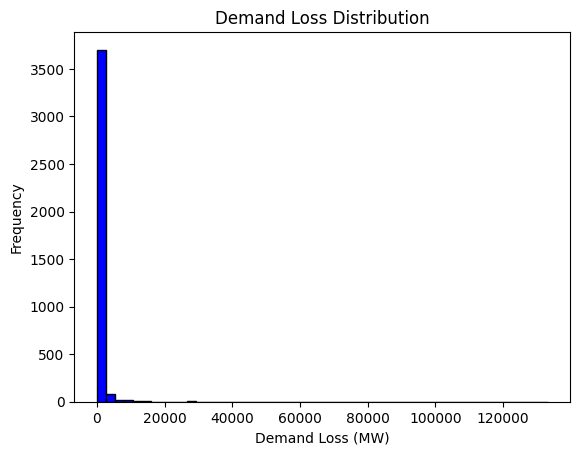

In [17]:
import matplotlib.pyplot as plt

demand_loss_distribution = df_knn['demand loss (mw)'].value_counts()

plt.hist(df_knn['demand loss (mw)'], bins=50, color='blue', edgecolor='black')
plt.title('Demand Loss Distribution')
plt.xlabel('Demand Loss (MW)')
plt.ylabel('Frequency')
plt.show()

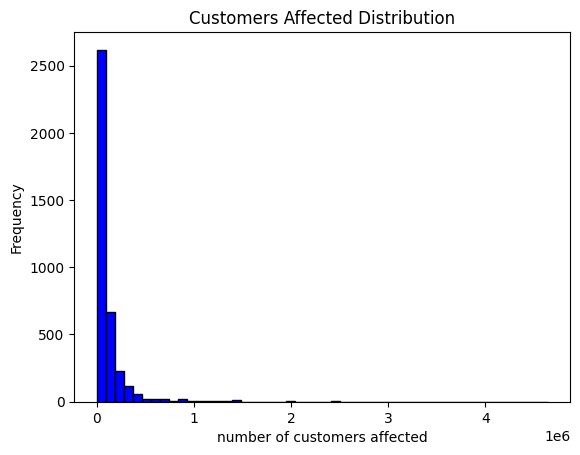

In [23]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
demand_loss_distribution = df_knn['number of customers affected'].value_counts()

# Optionally, you can visualize the distribution with a histogram
plt.hist(df_knn['number of customers affected'], bins=50, color='blue', edgecolor='black')
plt.title('Customers Affected Distribution')
plt.xlabel('number of customers affected')
plt.ylabel('Frequency')
plt.show()

In [73]:
df_final = df_3_5.copy()
# fillna for "demand loss" based specific to broad grouping

df_final['demand loss (mw)'] = df_final.groupby(['event type','state'])['demand loss (mw)'].transform(lambda x: x.fillna(x.mean()))
df_final['demand loss (mw)'] = df_final.groupby(['event type','nerc region'])['demand loss (mw)'].transform(lambda x: x.fillna(x.mean()))
df_final['demand loss (mw)'] = df_final.groupby(['event type'])['demand loss (mw)'].transform(lambda x: x.fillna(x.mean()))

df_final['demand loss (mw)'] = df_final['demand loss (mw)'].round(2)

# fillna for "number of customers affected" based on based specific to broad grouping
df_final['number of customers affected'] = df_final.groupby(['event type','state'])['number of customers affected'].transform(lambda x: x.fillna(x.mean()))
df_final['number of customers affected'] = df_final.groupby(['event type','nerc region'])['number of customers affected'].transform(lambda x: x.fillna(x.mean()))
df_final['number of customers affected'] = df_final.groupby(['event type'])['number of customers affected'].transform(lambda x: x.fillna(x.mean()))

df_final['number of customers affected'] = df_final['number of customers affected'].round(0).astype('Int64')


In [74]:
df_final = df_final.rename(str.upper, axis='columns')
df_final.to_excel('../data/processed/DOE_Final.xlsx', index=False)

In [24]:
df_lr = df_lr.rename(str.upper, axis='columns')
df_lr.to_excel('../data/processed/DOE_LR.xlsx', index=False)

In [41]:
df_lr = pd.read_excel('../data/processed/DOE_LR.xlsx')
df_lr = df_lr.rename(str.lower, axis='columns')

In [42]:
df_lr['demand loss (mw)'].describe()

count      3834.000000
mean        505.231899
std        2641.149764
min           0.000000
25%           0.000000
50%         180.000000
75%         503.750000
max      133200.000000
Name: demand loss (mw), dtype: float64

In [32]:
df_knn['demand loss (mw)'].describe()

count      3834.000000
mean        499.766813
std        2796.793002
min           0.000000
25%           0.000000
50%          93.600000
75%         300.000000
max      133200.000000
Name: demand loss (mw), dtype: float64

In [29]:
df_final['demand loss (mw)'].describe()

count      3834.000000
mean        559.198391
std        3147.493060
min           0.000000
25%           0.000000
50%         104.960000
75%         400.000000
max      133200.000000
Name: demand loss (mw), dtype: float64

In [43]:
df_lr['number of customers affected'].describe()

count    3.834000e+03
mean     1.034490e+05
std      2.456173e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.764000e+04
75%      1.130000e+05
max      4.645572e+06
Name: number of customers affected, dtype: float64

In [31]:
df_knn['number of customers affected'].describe()

count    3.834000e+03
mean     1.091359e+05
std      2.549270e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.208320e+04
75%      1.184174e+05
max      4.645572e+06
Name: number of customers affected, dtype: float64

In [30]:
df_final['number of customers affected'].describe()

count    3.834000e+03
mean     1.101833e+05
std      3.260802e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.591700e+04
75%      1.070000e+05
max      4.645572e+06
Name: number of customers affected, dtype: float64

df_lr has a lower standard deviation for both target columns; df_lr is the output of choice. 

In [30]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   month                         3834 non-null   object        
 1   time event began              3834 non-null   datetime64[ns]
 2   time of restoration           3834 non-null   datetime64[ns]
 3   area affected                 3834 non-null   object        
 4   nerc region                   3834 non-null   object        
 5   alert criteria                3834 non-null   object        
 6   event type                    3834 non-null   object        
 7   demand loss (mw)              3834 non-null   float64       
 8   number of customers affected  3834 non-null   float64       
 9   state                         3834 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 299.7+ KB


## Fill Missing Non-Event Dates

In [ ]:
import pandas as pd 
df_full = pd.read_excel('../data/processed/DOE_LR.xlsx')
df_lr = df_lr.rename(str.lower, axis='columns')

In [3]:
df_lr = df_lr.rename(str.upper, axis='columns')
df_full.to_excel('../data/processed/DOE_FULL.xlsx', index=False)

NameError: name 'df_full' is not defined